In [ ]:
%load_ext autoreload
%autoreload 2

# ConvLSTM 
> Conv lstm model

In [ ]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [ ]:
PATH = Path.cwd().parent/'data/UCF-101-frames'
Path.BASE_PATH = PATH.parent

In [ ]:
files = get_sequence_paths(PATH)

In [ ]:
def get_dls(image_size, seq_len, bs=4):
    "get ImageTuple dataloader"
    block = get_block(image_size, seq_len)
    return block.dataloaders(files, bs=bs)

In [ ]:
seq_len = 20
dls = get_dls(64, seq_len, bs=32)

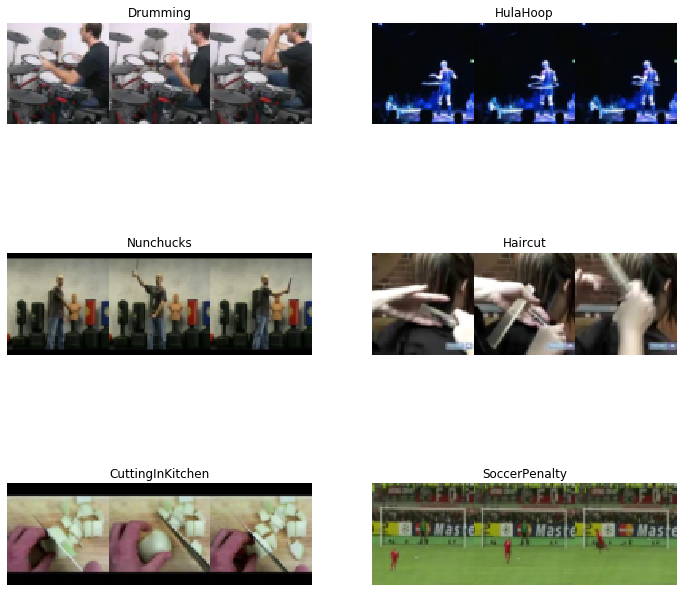

In [ ]:
dls.show_batch()

In [ ]:
model = ConvLSTM(num_classes=dls.c)

In [ ]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, cbs=[ModelReseter()], splitter=simple_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=0.14454397559165955)

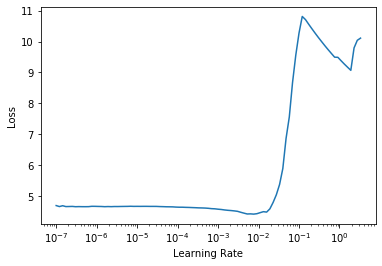

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.show_results()